In [5]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer , accuracy_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import tree

from nettoyagedata import nettoyage

In [6]:
acc_scorer=make_scorer(accuracy_score)
#acc_scorer=make_scorer(recall_score)

In [7]:
data=pd.read_csv("..\data\data_train_set.csv", sep=";", decimal=",")
data

<>:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
C:\Users\taqis\AppData\Local\Temp\ipykernel_16948\2703196138.py:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
  data=pd.read_csv("..\data\data_train_set.csv", sep=";", decimal=",")


,transactionId,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,886490,42,PAYMENT,2281.91,C415059780,204420.00,202138.09,M835111535,0.00,0.00,0
1,341154,16,CASH_OUT,88417.05,C895332610,0.00,0.00,C409275226,224165.66,312582.71,0
2,265496,15,PAYMENT,3180.83,C579167791,0.00,0.00,M2132900258,0.00,0.00,0
3,343968,16,CASH_IN,1270.74,C1443913460,30995.00,32265.74,C73791399,2082102.79,1561646.22,0
4,590855,33,PAYMENT,6785.34,C586745981,11049.00,4263.66,M1025692211,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...
806565,538785,21,CASH_IN,163835.65,C1298750155,17090.00,180925.65,C231329259,1668715.74,1504880.09,0
806566,717517,37,TRANSFER,1086792.33,C671671916,20648.00,0.00,C629443466,654273.06,1741065.39,0
806567,537812,21,CASH_OUT,19043.87,C1403091288,370.00,0.00,C1323988552,0.00,0.00,0
806568,911701,43,CASH_OUT,72922.23,C71143869,372.00,0.00,C1621169787,0.00,72922.23,0


In [8]:
print(data.head(10))
df=nettoyage(data)
print(df.head(10))

   transactionId  step      type     amount     nameOrig  oldbalanceOrg  \
0         886490    42   PAYMENT    2281.91   C415059780      204420.00   
1         341154    16  CASH_OUT   88417.05   C895332610           0.00   
2         265496    15   PAYMENT    3180.83   C579167791           0.00   
3         343968    16   CASH_IN    1270.74  C1443913460       30995.00   
4         590855    33   PAYMENT    6785.34   C586745981       11049.00   
5         915321    43  TRANSFER  383440.04   C651575504        3198.00   
6          55497     9  CASH_OUT  209603.00   C788199167      254930.17   
7         579236    33   CASH_IN  191505.72  C2012821562     7688926.45   
8         452976    19   PAYMENT    8229.61  C2125621755      177892.00   
9         531822    20  CASH_OUT  124639.46   C620761709      220249.48   

   newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  
0       202138.09   M835111535            0.00            0.00        0  
1            0.00   C40927

In [9]:
df.shape

(806570, 9)

In [10]:
df.dtypes

transactionId       int64
step                int64
type                  str
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [11]:
df.isnull().sum()

transactionId     0
step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [12]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 806570 entries, 0 to 806569
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   transactionId   806570 non-null  int64  
 1   step            806570 non-null  int64  
 2   type            806570 non-null  str    
 3   amount          806570 non-null  float64
 4   oldbalanceOrg   806570 non-null  float64
 5   newbalanceOrig  806570 non-null  float64
 6   oldbalanceDest  806570 non-null  float64
 7   newbalanceDest  806570 non-null  float64
 8   isFraud         806570 non-null  int64  
dtypes: float64(5), int64(3), str(1)
memory usage: 55.4 MB


In [13]:
df.describe()

,transactionId,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,8.065700e+05,806570.000000,8.065700e+05,8.065700e+05,8.065700e+05,8.065700e+05,8.065700e+05,806570.000000
mean,5.308686e+05,27.975328,1.705163e+05,8.856563e+05,8.946768e+05,9.821303e+05,1.126225e+06,0.008133
std,4.840743e+05,38.729894,3.560424e+05,2.999603e+06,3.023971e+06,2.318418e+06,2.443709e+06,0.089817
min,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.519462e+05,14.000000,1.285744e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,5.043160e+05,20.000000,8.053215e+04,1.651300e+04,0.000000e+00,1.306306e+05,2.282456e+05,0.000000
75%,7.561028e+05,38.000000,2.187701e+05,1.457197e+05,1.761591e+05,9.194431e+05,1.166735e+06,0.000000
max,6.362619e+06,743.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000


C:\Users\taqis\AppData\Local\Temp\ipykernel_16948\1849410580.py:2: Pandas4Warning: Starting with pandas version 4.0 all arguments of sum will be keyword-only.
  table.div(table.sum(1).astype(float),axis=0 ).plot(kind="bar", stacked=True)


Text(0, 0.5, 'Proportion de Fraude')

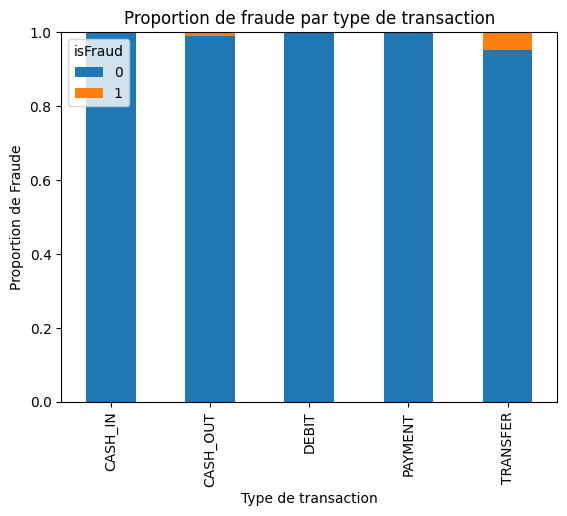

In [14]:
table=pd.crosstab(df["type"], df["isFraud"])
table.div(table.sum(1).astype(float),axis=0 ).plot(kind="bar", stacked=True)
plt.title("Proportion de fraude par type de transaction")
plt.xlabel("Type de transaction")
plt.ylabel("Proportion de Fraude")

In [15]:
# Encodage de la colonne 'type'
df = pd.get_dummies(df, columns=["type"], dtype=int)
print(df.head())

   transactionId  step    amount  oldbalanceOrg  newbalanceOrig  \
0         886490    42   2281.91       204420.0       202138.09   
1         341154    16  88417.05            0.0            0.00   
2         265496    15   3180.83            0.0            0.00   
3         343968    16   1270.74        30995.0        32265.74   
4         590855    33   6785.34        11049.0         4263.66   

   oldbalanceDest  newbalanceDest  isFraud  type_CASH_IN  type_CASH_OUT  \
0            0.00            0.00        0             0              0   
1       224165.66       312582.71        0             0              1   
2            0.00            0.00        0             0              0   
3      2082102.79      1561646.22        0             1              0   
4            0.00            0.00        0             0              0   

   type_DEBIT  type_PAYMENT  type_TRANSFER  
0           0             1              0  
1           0             0              0  
2          

In [16]:
#Separation des features par rapport à la cible
features=df.drop("isFraud",axis=1)
y=df.isFraud
features.head()
features.shape

(806570, 12)

In [17]:
print(features.select_dtypes(include="object").columns)

Index([], dtype='str')


In [18]:
features.head()

,transactionId,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,886490,42,2281.91,204420.0,202138.09,0.00,0.00,0,0,0,1,0
1,341154,16,88417.05,0.0,0.00,224165.66,312582.71,0,1,0,0,0
2,265496,15,3180.83,0.0,0.00,0.00,0.00,0,0,0,1,0
3,343968,16,1270.74,30995.0,32265.74,2082102.79,1561646.22,1,0,0,0,0
4,590855,33,6785.34,11049.0,4263.66,0.00,0.00,0,0,0,1,0


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64

In [20]:
x_train, x_test, y_train , y_test=train_test_split(features,y, test_size=0.3, random_state=0, stratify=y)
#stratify sert à conserver la même proportion de classes (fraude / non-fraude)dans le train ET le test.


In [21]:
# install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [22]:
smote = SMOTE(random_state=0)

x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
print("Avant SMOTE :", y_train.value_counts())

Avant SMOTE : isFraud
0    560007
1      4592
Name: count, dtype: int64


In [23]:
print(y_train.value_counts())
print(y_train_smote.value_counts())

isFraud
0    560007
1      4592
Name: count, dtype: int64
isFraud
0    560007
1    560007
Name: count, dtype: int64


In [24]:
random_forest = RandomForestClassifier(random_state=0)

random_forest.fit(x_train_smote, y_train_smote)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [25]:
y_pred_smote = random_forest.predict(x_test)

print("Recall fraude (SMOTE) :", recall_score(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))

Recall fraude (SMOTE) : 0.9776422764227642
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    240003
           1       0.97      0.98      0.97      1968

    accuracy                           1.00    241971
   macro avg       0.98      0.99      0.99    241971
weighted avg       1.00      1.00      1.00    241971



In [26]:
random_forest=RandomForestClassifier (random_state=0, n_jobs=-1) #n_jobs indique combien du processeur seront utilisés pour l'entraînement
parametres={"n_estimators":[3,4,5,10,15,20,35],"criterion":['entropy', 'gini'], 'max_depth':[2,3,5,10]}

grid_obj=GridSearchCV(random_forest, parametres, scoring=acc_scorer, cv=3)
grid_obj.fit(x_train, y_train)
clf=grid_obj.best_estimator_

print(clf)
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))
print(clf.score(features, y))

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=35,
                       n_jobs=-1, random_state=0)
0.9997927732780256
0.9996983109546185
0.9997644345810035


In [27]:
y_pred = clf.predict(x_test)

In [28]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[240002      1]
 [    72   1896]]


1426 Fraudes détectées

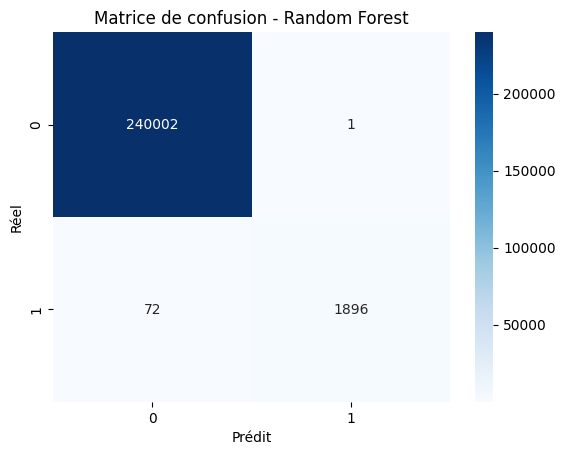

In [29]:
import seaborn as sns

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - Random Forest")
plt.show()


In [30]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

recall_fraud = TP / (TP + FN)
print("Recall fraude :", recall_fraud)


Recall fraude : 0.9634146341463414


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    240003
           1       1.00      0.96      0.98      1968

    accuracy                           1.00    241971
   macro avg       1.00      0.98      0.99    241971
weighted avg       1.00      1.00      1.00    241971



**utilisation de SMOTE( synthetic minority over-sampling technique )**

In [32]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 35,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

[Text(0.731556056701031, 0.9545454545454546, 'x[0] <= 1004211.0\nentropy = 0.068\nsamples = 357169\nvalue = [560053, 4546]'),
 Text(0.7212467783505154, 0.8636363636363636, 'x[4] <= 0.365\nentropy = 0.007\nsamples = 354491\nvalue = [560053, 297]'),
 Text(0.7264014175257731, 0.9090909090909092, 'True  '),
 Text(0.4837306701030928, 0.7727272727272727, 'x[3] <= 335153.5\nentropy = 0.011\nsamples = 197313\nvalue = [311250, 294]'),
 Text(0.26417525773195877, 0.6818181818181818, 'x[0] <= 7010.5\nentropy = 0.007\nsamples = 196458\nvalue = [310070.0, 165.0]'),
 Text(0.13659793814432988, 0.5909090909090909, 'x[5] <= 102575.5\nentropy = 0.153\nsamples = 942\nvalue = [1464, 33]'),
 Text(0.12628865979381443, 0.5, 'x[5] <= 25972.0\nentropy = 0.22\nsamples = 609\nvalue = [906, 33]'),
 Text(0.08762886597938144, 0.4090909090909091, 'x[0] <= 6991.5\nentropy = 0.185\nsamples = 545\nvalue = [826, 24]'),
 Text(0.07731958762886598, 0.3181818181818182, 'x[8] <= 0.5\nentropy = 0.168\nsamples = 544\nvalue = [8

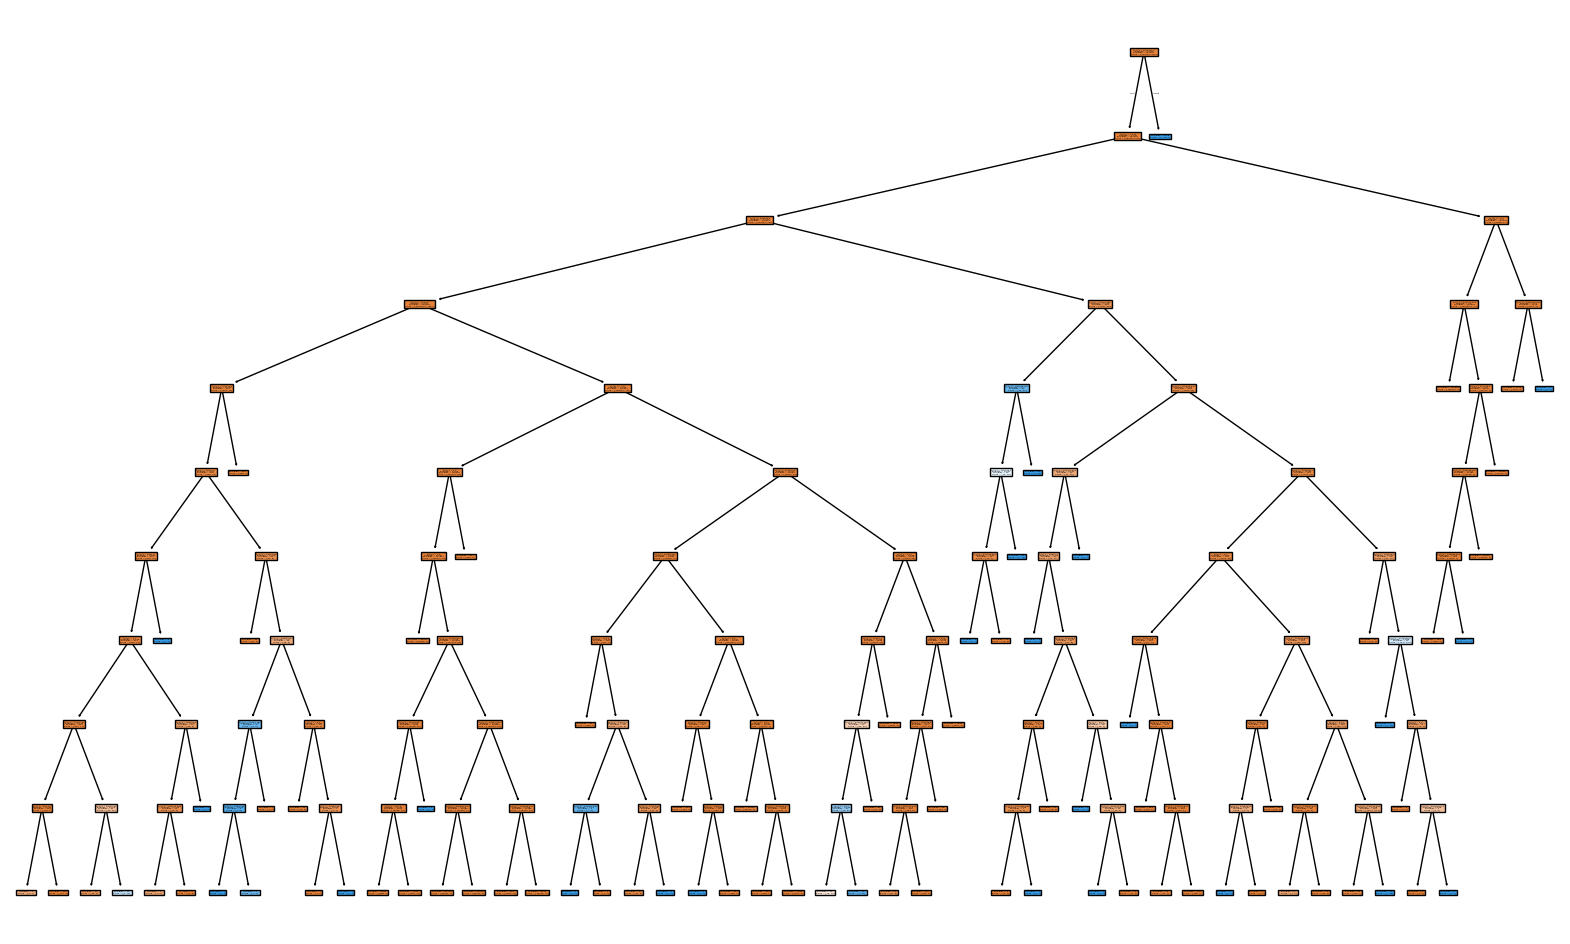

In [33]:
plt.figure(figsize=(20,12))
tree.plot_tree(clf.estimators_[3],filled=True)

<>:9: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:9: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
C:\Users\taqis\AppData\Local\Temp\ipykernel_16948\3993913817.py:9: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
  df = pd.read_csv("..\data\data_train_set.csv",sep=";",decimal=",")


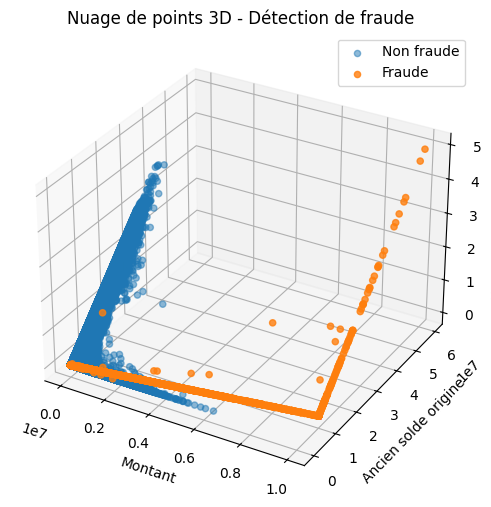

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # nécessaire pour 3D

# %matplotlib notebook  # ou inline
%matplotlib inline

# Charger le fichier CSV
df = pd.read_csv("..\data\data_train_set.csv",sep=";",decimal=",")

# Créer la figure et l'axe 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Séparer fraude / non fraude
fraud = df[df["isFraud"] == 1]
non_fraud = df[df["isFraud"] == 0]

# Scatter non-fraude
ax.scatter(
    non_fraud["amount"],
    non_fraud["oldbalanceOrg"],
    non_fraud["newbalanceOrig"],
    label="Non fraude",
    alpha=0.5
)

# Scatter fraude
ax.scatter(
    fraud["amount"],
    fraud["oldbalanceOrg"],
    fraud["newbalanceOrig"],
    label="Fraude",
    alpha=0.8
)

# Labels
ax.set_xlabel("Montant")
ax.set_ylabel("Ancien solde origine")
ax.set_zlabel("Nouveau solde origine")
ax.set_title("Nuage de points 3D - Détection de fraude")

ax.legend()
plt.show()

